In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Repalacing blanks with 0 as tenure is 0 and no total charges are recorde

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)      

# converted 0 & 1 values of sennior citizen to yes/no to make it easier to understand

In [12]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
# Reasons Why any customer did stopped using services, Which type of custyomer do they have?
# We first basic understanding here to bring of a What percentange of the Customer has churned out and not 
# We use count plot 

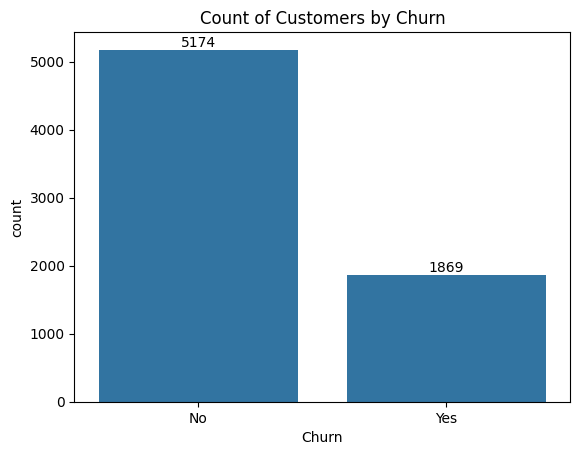

In [14]:
ax = sns.countplot( data = df , x= "Churn")

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")

plt.show()

# From the given Pie chart we can conclude that 26.54% of our customers have churned out. Now let's explore the reason behind it 

In [24]:
gb = df.groupby("Churn").agg({"Churn":"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


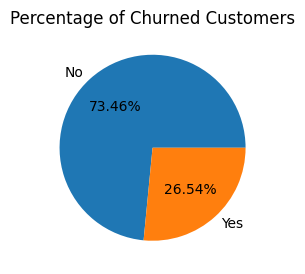

In [15]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
gb
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%" )
plt.title("Percentage of Churned Customers", fontsize = 12)
plt.show()

# Churn By Gender

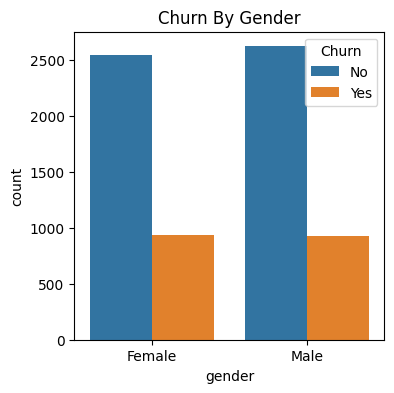

In [16]:
plt.figure(figsize = (4,4))
sns.countplot(data = df, x = "gender" ,hue = "Churn") 
plt.title("Churn By Gender")
plt.show()

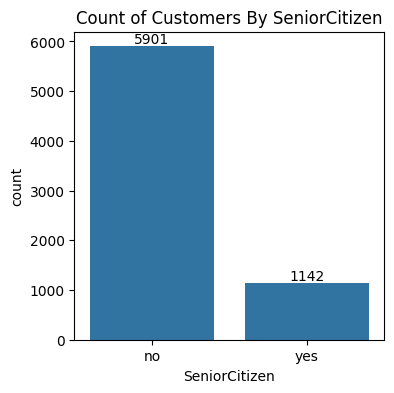

In [29]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "SeniorCitizen" ) 
ax.bar_label(ax.containers[0])
plt.title("Count of Customers By SeniorCitizen")
plt.show()

# comparative a greater percentage of people in senior citizen category have churned

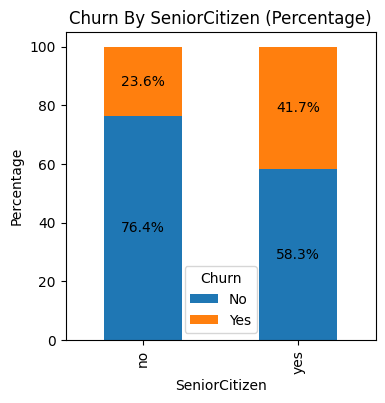

In [18]:
import matplotlib.pyplot as plt
import pandas as pd  

# Group the data by SeniorCitizen and Churn
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage of each category
df_grouped_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = df_grouped_percentage.plot(kind='bar', stacked=True, figsize=(4, 4), )

# Add percentage labels to each section
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Add a title and labels
plt.title("Churn By SeniorCitizen (Percentage)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")

plt.show()


# People who have used our services for a long stayed and people who have used our services 1 or 2 months have churned 

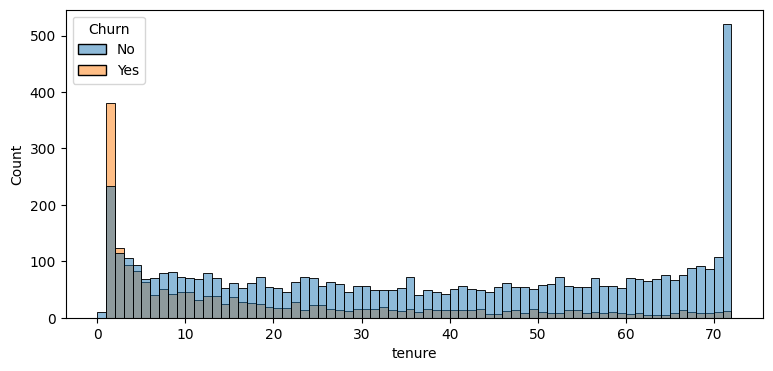

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df , bins = 72 , hue = "Churn")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract

# so we need tip something about it , what we people , if they go for one or two year contract , What befefits do they get from the contract ?

# That's why many companies can be found , if you use any of these sims , then most of the 6 months or 10 months duration , which our bills or plans , those comparative features give us more better fetures and benifits give , i mean more Provide benfits compared to once , that we have for one montrh because we know that once the person  has given the money . he/she will stay with us  .
comnverting a customer 
# which tells us that we try here when we are , If new customers are also coming then we will try , hows to sell out longer duration plans

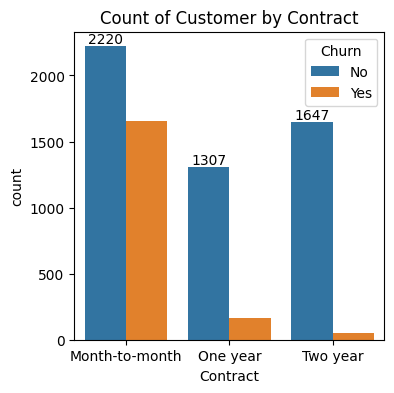

In [20]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "Contract" , hue = "Churn" ) 
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Those who took multiple lines well, there are more people who don"t but people who don"t has got a lot of yes inside  more that means we need to work on this
# fiber optics people has used a lot has curned , dSL people are living on ,
# but there is some problem with fiber potics , if the fiber optics people are leaving then fiber optics needs to be improve over here 
# similarly online backup, online security also includes device protection ,You can see how thye values are comming
# There is no one in case of Tech support No ,those who have not taken tech support , 
# those people are  mostly the people who people are not using our service and if they have used the serivce then from that 
# ____ there are people with fiber optics ,who are curned 
# ____ There are problems with multiple lines also .
# _____ There has been campartive in phone service , if we look , people are doing it , but not that much . as much as is happening inside comparative othe cases

# ===> So This is How we can see our values out of our data by using a subplot , what does plot overhere subplot do ? create subplots within a single plot gives whose count plot , since our there were 9 columnxs neearby , so we were from 9 columns able to show characteristics here

# Resultant
# The countplots provide insights into customer churn based on various telecom services. Customers without internet service show a lower churn rate across different categories like streaming and tech support. However, those using fiber optic internet, multiple lines, or lacking online security, backup, or tech support are more likely to churn. Generally, customers with additional services like device protection and streaming seem less prone to churn compared to those without.


# The countplots illustrate customer churn patterns across various telecom services. Customers with fiber optic internet, multiple lines, or without services like online security, backup, or tech support are more likely to churn. In contrast, those with internet services, especially DSL, and additional features like device protection or streaming services tend to show a lower churn rate.



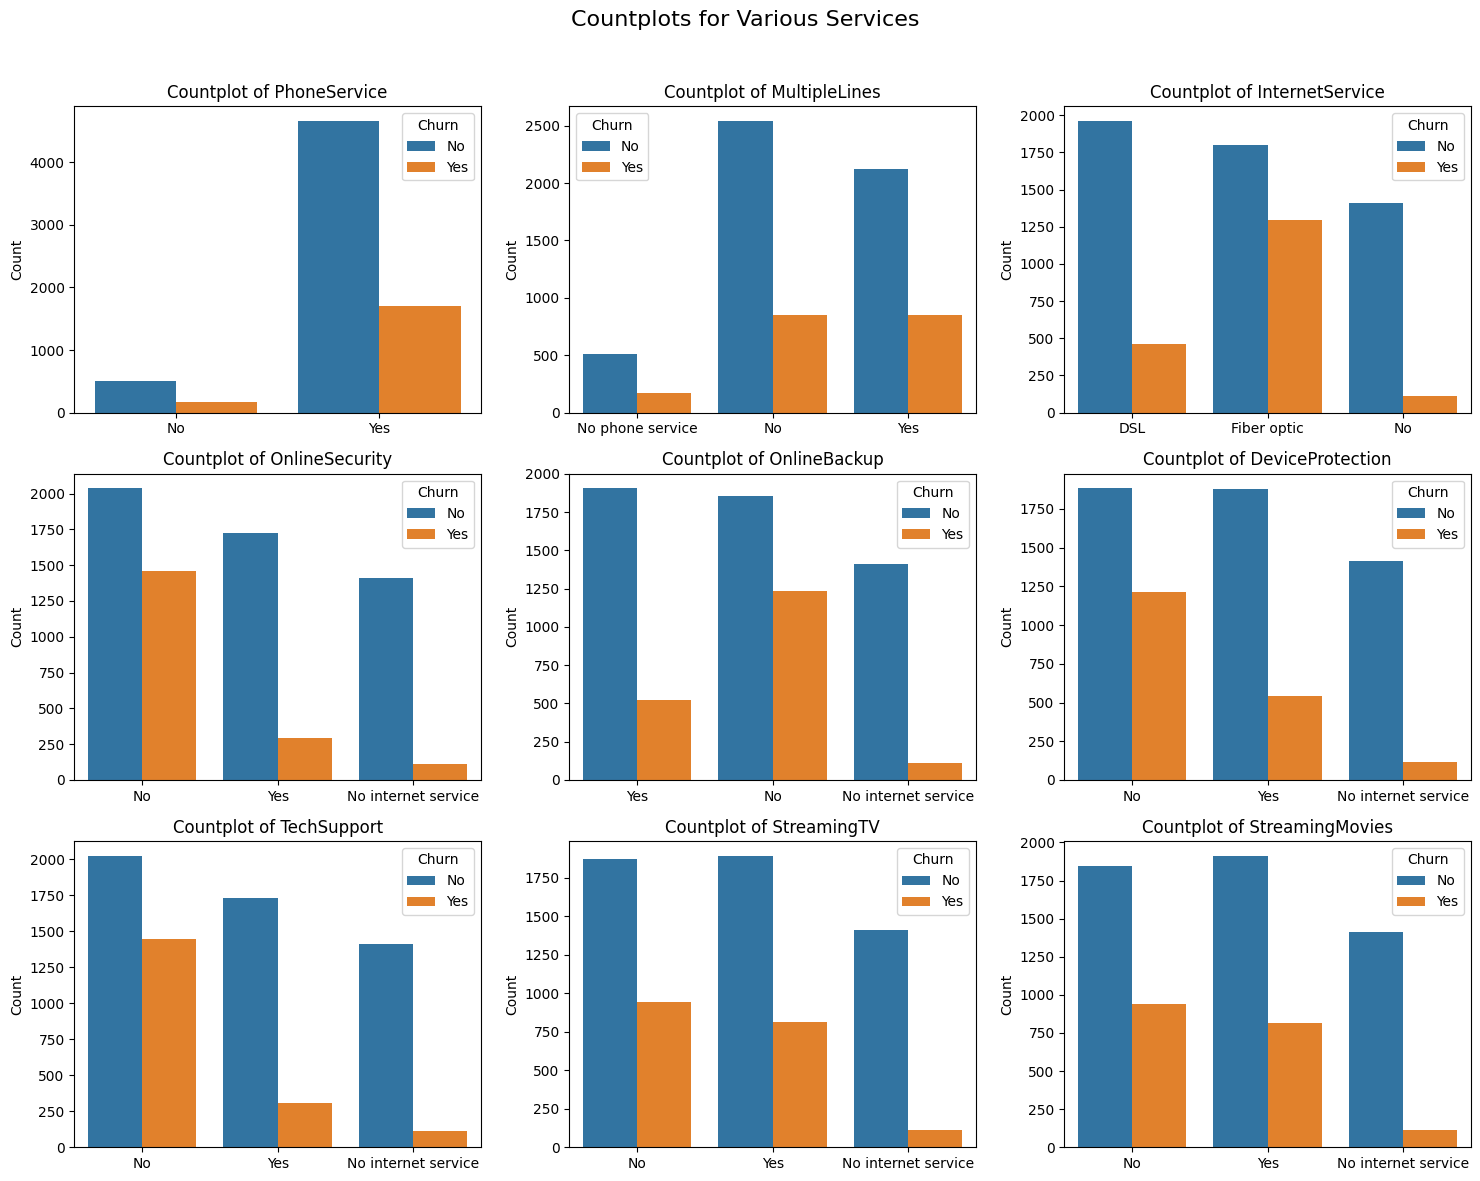

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set the number of subplots - in this case, we'll use a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # Adjust the grid size and figure size as needed
fig.suptitle('Countplots for Various Services', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')  # Optional: remove x-label for cleanliness
    axes[i].set_ylabel('Count')  # Add y-label to show counts

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to leave space for the suptitle
plt.show()
 

# Customer is likely to churn when he is using electronic check as a payment method.

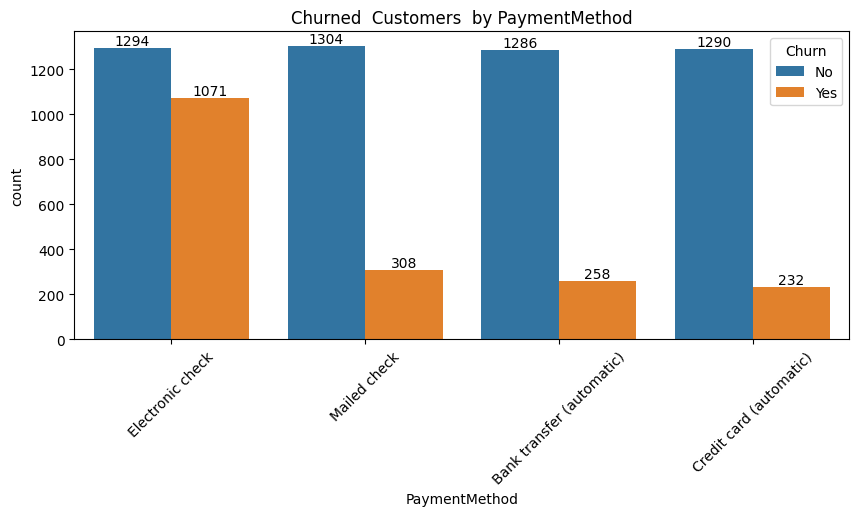

In [23]:
plt.figure(figsize = (10,4))
ax = sns.countplot(data = df, x = "PaymentMethod" , hue = "Churn" ) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Churned  Customers  by PaymentMethod")
plt.show()

# Where automatic bank transfer or credit card automatic payment , In this case of , less churning is taking because What is the reason that ,
# if we start it once  ,like we lot of use spotify or youtube premiums , usually payments goes automatically , in monthly , so donot reduce the payment, lot we instead do this , we continue theuiur services, we are not use it that much but we use these services   